In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.datasets import mnist
np.random.seed(0)

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(f'x_train: {x_train.shape},\t y_train: {y_train.shape}')
print(f'x_train: {x_train.shape},\t y_test: {y_test.shape}')

x_train: (60000, 28, 28),	 y_train: (60000,)
x_train: (60000, 28, 28),	 y_test: (10000,)


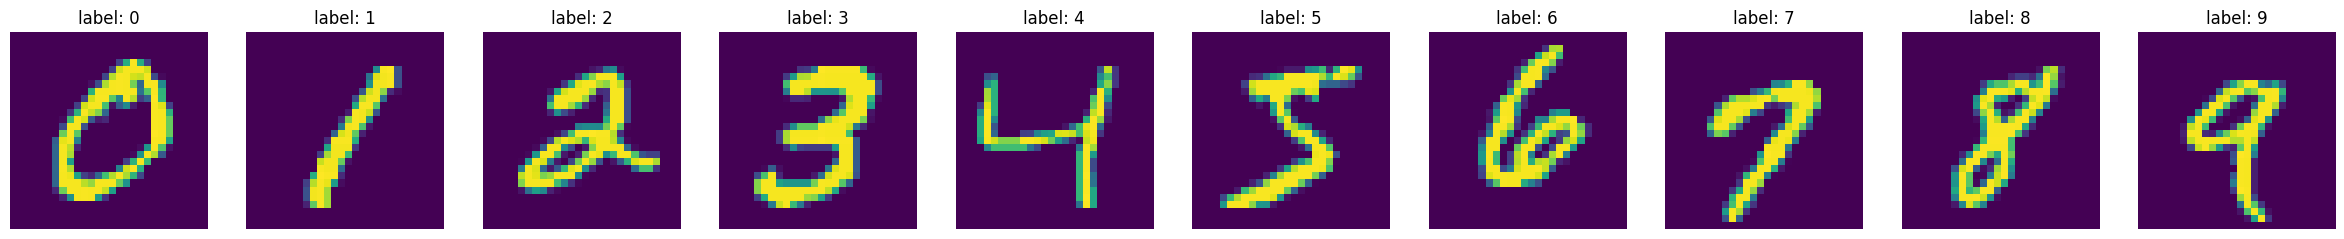

In [4]:
#display images with labels (0-9)
f, axs = plt.subplots(1, 10, figsize=(30,30))

for i in range(10):
    tmp = x_train[y_train == i][0]
    axs[i].imshow(tmp)
    axs[i].axis('off')
    axs[i].set_title(f'label: {i}')

In [5]:
#Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)

In [6]:
print(f'x_train shape after reshape:\t{x_train.shape}')

x_train shape after reshape:	(60000, 784)


In [7]:
model = Sequential([
    tf.keras.Input(shape=x_train.shape[1]),
    Dense(units=128, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=10, activation='linear')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

In [10]:
history = model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2322
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0973
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0677
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0508
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0409
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0334
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0264
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0229
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0216
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0183


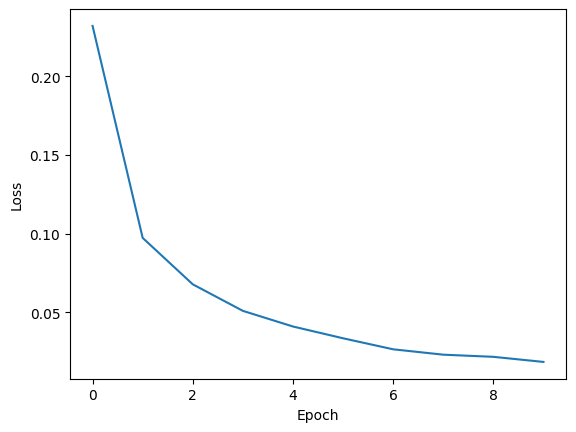

In [11]:

#plot of training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [12]:
prediction = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [13]:
prob0 = tf.nn.softmax(prediction[0])
print(f'probability x_test[0]: {prob0}')
print(f'sum: {np.sum(prob0)}')

probability x_test[0]: [7.6289444e-12 7.6407813e-09 2.8613114e-09 6.6061062e-08 4.2508935e-13
 4.6733169e-13 3.8628506e-16 9.9999988e-01 7.8920689e-12 8.2407068e-09]
sum: 0.9999999403953552


In [14]:
def probability(predictions):
  m,n = predictions.shape
  prob = np.zeros((m,n))
  for i in range(m):
    prob[i] = (tf.nn.softmax(predictions[i])).numpy()
  return prob

In [15]:
print(f'predictions: {prediction[0]}')
print(f'Largest predictions index: {np.argmax(prediction[0])}')

predictions: [ -8.977183    -2.0678797   -3.0500975    0.08920174 -11.864589
 -11.76985    -18.868069    16.621887    -8.943275    -1.9922918 ]
Largest predictions index: 7


In [16]:
def yhat(probability):
  m = probability.shape[0]
  yhat = np.zeros(m)
  for i in range(m):
    yhat[i] = int(np.argmax(probability[i]))
  return yhat

In [17]:
predicted_labels = yhat(probability(prediction))
print("   PREDICTED\t   ACTUAL")
for i in range(20):
  print(f'\t{int(predicted_labels[i])}\t|\t{y_test[i]}')

   PREDICTED	   ACTUAL
	7	|	7
	2	|	2
	1	|	1
	0	|	0
	4	|	4
	1	|	1
	4	|	4
	9	|	9
	5	|	5
	9	|	9
	0	|	0
	6	|	6
	9	|	9
	0	|	0
	1	|	1
	5	|	5
	9	|	9
	7	|	7
	3	|	3
	4	|	4


In [18]:
loss = model.evaluate(x_test,y_test,verbose=0)
print(f'Loss on Test Set:{loss}')

Loss on Test Set:0.0950770154595375


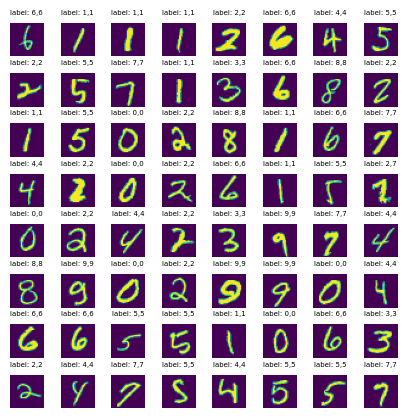

In [19]:
#show random digits with actual and predicted label
m,n = x_test.shape
fig, axs = plt.subplots(8,8, figsize=(5,5))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for i,ax in enumerate(axs.flat):
    random_index = np.random.randint(m)
    tmp = x_test[random_index].reshape(28,28)
    ax.imshow(tmp)
    ax.set_axis_off()
    ax.set_title(f'label: {y_test[random_index]},{int(predicted_labels[random_index])}',fontsize=5)